Notebook is copyright &copy; of <a href="https://ajaytech.co"> Ajay Tech</a>. You can find an online version of the same at <a href="https://ajaytech.co/python-machine-learning-lifecycle"> Machine Learning Lifecycle</a> or on <a href="https://github.com/ajaytech002"> Ajay Tech's gitjhub page</a>

# Machine Learning Lifecycle with R

## Contents

- What is Machine Learning lifecycle
- Data Ingestion
  - Data Import
    - Excel Files
    - Flat Files
    - Web Scraping
    - API
    - Database
  - Feature Extraction
  - Data Preprocessing
    - Feature Scaling
    - Non-linear Transformations
    - Encoding Categorical Variables
      - Ordinal Encoding
      - One-hot encoding
  - Imputation of missing values
    - Simple Imputer
    - Iterative Imputer (Predictive)
  - Dimensionality Reduction <sup>&sect;</sup>
- Data Modeling <sup>*</sup>
  - Model Accuracy Metrics
  - Validation
- Deployment <sup>**</sup>

<sup>&sect;</sup> - will be dealt with on Day 18 <br>
<sup>\*</sup> - _Modeling will be dealt with in week 3 and week 4_ <br>
<sup>**</sup> - _will be dealt with on day 19_

<hr>

### Machine Learning Lifecycle

Just like any project following the software engineering process, Machine Learning also has a lifecycle. Since Machine Learning is more data oriented, the bulk of the time is spent with data. At a high level, the machine learning lifecycle looks something like this.


<img src="./pics/machine-learning-lifecycle-high-level.png"/>

We are not talking about some of the much higher level project activities like

- Project Objectives
- Staffing
- Risk Management etc

Those will be talked about in the context of pure _Project Management_. In this section, we will be talking about the activities that you would have to be part of as either a **Machine Learning Engineer** or __Project lead__. 

If you are wondering why the boxes are not even in size, it is signify the amount of time you will be spending in each of these activities. As you can see, the bulk of the activities are centered around the Data Ingestion process - and that will be the focus of this section. Modeling will be what the rest of this course will focus on. Deployment will focus on how the actual Machine Learning solution will be deployed in a live environment and how the results will be distributed to the users.

<hr>

### Data Ingestion

This is where you will be spending most of your time as an ML engineer. Data is messy - there is so many things to be done like finding the right data sources, cleansing, deduplication, validation etc. These are pretty broad topics that require a variety of skills like SQL, data pre-processing techniques, good excel skills and so on. We will not be discussing all of the steps in data ingestion. We will only be focusing on the following activities highlighted in bold, specifically in the context of NumPy, Pandas & Scikit Learn. 

<hr>

#### Data Import 

Data import is a tedious and typically time consuming. Sourcing the data is not all that straight forward most of the time. 

- **Easy** - Sometimes, data is readily available. For example, if you were doing movie recommendations algorithm in Netflix, most of the data is readily available in their database. 
- **Medium** - Data is readily available but in different silos/formats. For example, in the same example as above, imagine you were to get data related to external movie ratings (on top of netflix's own movie data). This would require some level of data mangling, munging, mixing etc. 
- **Hard** - Data is sometimes hard to get using regular methods. You might have to resort to special techniques like data scraping, write bulk downloaders using APIs etc . In some of these cases, the quality of data might also be questionable. 

We will be dealing with some of the simpler methods of importing data.

<hr>

#### Import Data from Excel files

**Using readxl**

Part of the **tidyverse** package, **readxl ( )** unlike other packages (for ex., xlsx ) that require external dependencies(for ex., packae xlsx requires Java to be installed).

In [16]:
library("tidyverse")

shopping_cart = read_excel("./data/shopping_cart.xlsx")
head(shopping_cart, 2)

InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
<dbl>,<chr>,<chr>,<dbl>,<dttm>,<dbl>,<dbl>,<chr>
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


If you don't want to use the **tidyverse( )** library, you can use **xlsx** library. However, this package requires JAVA to be installed. Check that JAVA_HOME is set as an environment variable.

In [18]:
library(xlsx)

shopping_cart = read.xlsx("./data/shopping_cart.xlsx", sheetIndex = 1)
head(shopping_cart, 2)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
,<dbl>,<fct>,<fct>,<dbl>,<dttm>,<dbl>,<dbl>,<fct>
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
2,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


<hr>

#### Import Data from Flat files

Flat files are typically either in CSV(Comma Separated Values) or TSV ( Tab Separated values) or any flat file format delimited by any kind of delimiter. Here are some popular examples

- tab ( \t )
- pipe delimited ( | )
- comma (,) etc

In R, there is a readymade function just for CSV files.

In [21]:
shopping_cart = read.csv("./data/india_population.csv")
head(shopping_cart, 2)

,year,population
,<int>,<int>
1,1950,376325200
2,1951,382245303


For other delimiters, use **read.table( )** which lends itself to any kind of delimiter.

In [24]:
iris = read.table(file = "./data/iris.txt" , sep = "\t", header = TRUE)
head(iris,2)

,sepal_length,sepal_width,petal_length,petal_width,species
,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0


<hr>

#### Import Data using Web Scraping

**Downloading HTML tables using Excel**

Simple HTML tables on the web can be downloaded using Excel's data function. For example, in some of the chapters of this course, I have downloaded population data from <a href="https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)">Wikipedia</a> using Excel.

<img src="./pics/wikipedia-population-data.png"/>

To download it from excel, go to the following menu location.

<img src="./pics/excel-download-from-web.png"/>

Enter the URL and click _Import_.

<img src="./pics/excel-web-query.png"/>

Data is downloaded into excel cells.

<img src="./pics/data-in-excel.png"/>

<hr>

**Scrape Websites**

Sometimes the only form of data available is on the browser - for example, you are a third party aggregator trying to gather the best promotion on flight tickets from multiple websites. The actual website might not be willing to give you the data straight away. In cases like this, you have to literally scrape the price/discount off of their website. 

Luckily, there are some libraries in R that can do all the heavy lifting ( HTTP handshake, parsing, creating deep data structures etc). One such library is **rvest**. Let's see how to scrape 

Install rvest
<pre>
> install.packages("rvest")
</pre>

Let's find out the price of Apple iPhone 11 Pro (64GB) - Space Grey on Amazon.in. Navigate to the web page and find out the xpath of the particular value you are looking for. Set that page as a variable and xpath as a parameter in html_nodes function.

In [46]:
library(rvest)
html = read_html("https://www.amazon.in/dp/B07XLS522R")

nodes = html_nodes(x = html,xpath = '//*[@id="priceblock_ourprice"]')
print ( html_text(x = nodes) )

[1] "<U+20B9> 96,900.00"


Now, everytime you want the price, all you have to do is execute this piece of code. 

<hr>

**API**

API stands for _Application Programming Interface_. It is a way to give programmatic access to a resource. For example, your Alexa machine goes out automatically(programmatically) and fetches the weather data for a particular zip code from weather.com. How does it do it ? 

Weather.com provides an **API** to programmatically fetch weather data. Other examples could be xe.com providing _API_ for exchange rates or Bloomberg providing _API_ for stock tickets. etc. 

In this section, let's using Python to get the weather information on a particular zip code. In order to avoid abuse and keep track of requests, most of the time an API _Key_ is provided. You can sign up for weather.com and a key will be provided to you. Without that key weather.com would not honour API requests. 

<img src="./pics/api-key.png"/>

**APIs** are typically exposed as URLs. For example, to get the weather by a city, use the following API.

<img src="./pics/weather-api-by-city.png"/>

Let's use R to extract weather for a city in India - say Hyderabad. Don't forget to append the API key using the attribute _appid_. See the url formation below.

Install the **httr** package.

In [59]:
library(httr)

url = "http://api.openweathermap.org/data/2.5/weather?q=Hyderabad&appid="
key = "37a81ae1e682ac417883b0a3727080a6"

url = paste(url , key, sep="")
print ( url)

response = GET(url)
content(response)

[1] "http://api.openweathermap.org/data/2.5/weather?q=Hyderabad&appid=37a81ae1e682ac417883b0a3727080a6"


$coord
$coord$lon
[1] 78.47

$coord$lat
[1] 17.38


$weather
$weather[[1]]
$weather[[1]]$id
[1] 721

$weather[[1]]$main
[1] "Haze"

$weather[[1]]$description
[1] "haze"

$weather[[1]]$icon
[1] "50d"



$base
[1] "stations"

$main
$main$temp
[1] 298.7

$main$feels_like
[1] 300.5

$main$temp_min
[1] 298.15

$main$temp_max
[1] 299.15

$main$pressure
[1] 1018

$main$humidity
[1] 74


$visibility
[1] 5000

$wind
$wind$speed
[1] 3.1

$wind$deg
[1] 90


$clouds
$clouds$all
[1] 40


$dt
[1] 1581334756

$sys
$sys$type
[1] 1

$sys$id
[1] 9214

$sys$country
[1] "IN"

$sys$sunrise
[1] 1581297329

$sys$sunset
[1] 1581338718


$timezone
[1] 19800

$id
[1] 1269843

$name
[1] "Hyderabad"

$cod
[1] 200

Incidentally, weather.com provides data in a specific format called JSON. JSON stands for **Java Script Object Notation**. Once again, R provides a standard library called **jsonlite** that can prase JSON data for us.

In [57]:
library(jsonlite)

df = fromJSON(content(response, as = "text"))
df

,id,main,description,icon
,<int>,<chr>,<chr>,<chr>
1,721,Haze,haze,50d


Once you have the data into an R object, you can use the regular $ notation to extract data from the dataframe. For example, to get the city, use  

In [60]:
df$name

[1] "Hyderabad"

To get the minimum and maximum temperature, use

In [64]:
cat ( df$main$temp_min, df$main$temp_max )


298.15 299.15

Just in case you are wondering why the temperature is so large, it is because the unit of temperature is Kelvin.

<hr>

**Database**

Sometimes you might be asked to pick the data straight from an SQL database. To do this though, you will need to understand the language of any SQL database - **SQL**  or _Structured Query Language_. And luckily, we can do all of this straight from Python or outside of Python. 

Typically, you will be given the database details like below. 

<pre>
Server Address : xx.xx.xx.xx
port           : 33xx
schema         : xxxx

user id        : xxxx
password       : xxxx
</pre>


For example, I have installed a simple MySql database on my local machine. I will be showing how to connect to the database right from inside the python environment. You can also use any other SQL interaction tools, like SQL Workbench etc.

To be able to connect to SQL server, you would need a Python connector. Installing it is pretty simple. 

<pre>
> pip install mysql-connector
</pre>

In [1]:
import mysql.connector

db = mysql.connector.connect(
  host     = "localhost",
  user     = "root",
  passwd   = "xxxxxxxx"
)

In [2]:
db

Database interactions are typically retrieved using something called a **cursor**. A Cursor is just a pointer to a set of data retrieved from the database. It is upto us to iterate over the retrieved data and get what we went. Typically this is done using a loop. So, this is basically a 2 step process

1. *Execute an SQL statement and get the result into a cursor*
2. *Iterate over the cursor to get the data*

For example, let's do these 2 steps to list all the databases. Each database is essentially a collection of tables.

**Step 1** - Get the list of tables into a cursor

In [3]:
cur = db.cursor()

cur.execute("SHOW DATABASES")

**Step 2** - Iterate over the cursor to get the list of databases

In [4]:
for db in cur:
  print(db)

('information_schema',)
('mysql',)
('performance_schema',)
('sakila',)
('sys',)
('world',)


Once we know the list of databases, we have to select the database first. Once we do that, we can freely go about executing the **select** statements on that particular database.

In [6]:
cur.execute("use world")

List all the tables in the database.

In [10]:
cur.execute("show tables")

In [11]:
for table in cur:
  print(table)

('city',)
('country',)
('countrylanguage',)


Let's pick a table - say **country**. Now, let's extract all the columns in that table. They will become the columns of our Pandas dataframe.

In [37]:
cur.execute("show columns from country")

In [38]:
column_names = []
for column in cur:
  column_names.append(column[0])

columns

['Code',
 'Name',
 'Continent',
 'Region',
 'SurfaceArea',
 'IndepYear',
 'Population',
 'LifeExpectancy',
 'GNP',
 'GNPOld',
 'LocalName',
 'GovernmentForm',
 'HeadOfState',
 'Capital',
 'Code2']

Once we got the column names, let's get the actual data from the table.

In [52]:
cur.execute("select * from country")

In [53]:
import pandas as pd

country_data = pd.DataFrame(columns = column_names)

rows = []
for data in cur:
  rows.append(list(data))

country_data = pd.DataFrame(rows)

In [55]:
country_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,828.0,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6648.0,7984.0,Angola,Republic,JosÃ© Eduardo dos Santos,56.0,AO
3,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,63.2,NaN,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3205.0,2500.0,ShqipÃ«ria,Republic,Rexhep Mejdani,34.0,AL


Great !!! We just need one last step before we finish creating the table into a Pandas dataframe. Set the column names that we have already extracted in a previous step.

In [57]:
country_data.columns = column_names

country_data.head()

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,828.0,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6648.0,7984.0,Angola,Republic,JosÃ© Eduardo dos Santos,56.0,AO
3,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,63.2,NaN,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3205.0,2500.0,ShqipÃ«ria,Republic,Rexhep Mejdani,34.0,AL


<hr>

### Data Preprocessing

This is a pretty important step - Think of this as standardizing data into a format that is more useful for Machine Learning algorithms. We will discuss 3 important steps in data pre-processing.

#### Feature Scaling

We have already seen (in the <a href="/r-classification#feature-scaling">Introduction to Classification</a> that scaled data performs much better with Machine Learning Algorithms than un-scaled data. For example, let's take quick sample and plot it before and after to understand what is happening visually.

In [67]:
# Generate 25 points of random data with mean of 10 and sd of 5

x_unscaled = rnorm(n = 25, mean = 10, sd = 5)
y_unscaled = rnorm(n = 25, mean = 10, sd = 5)

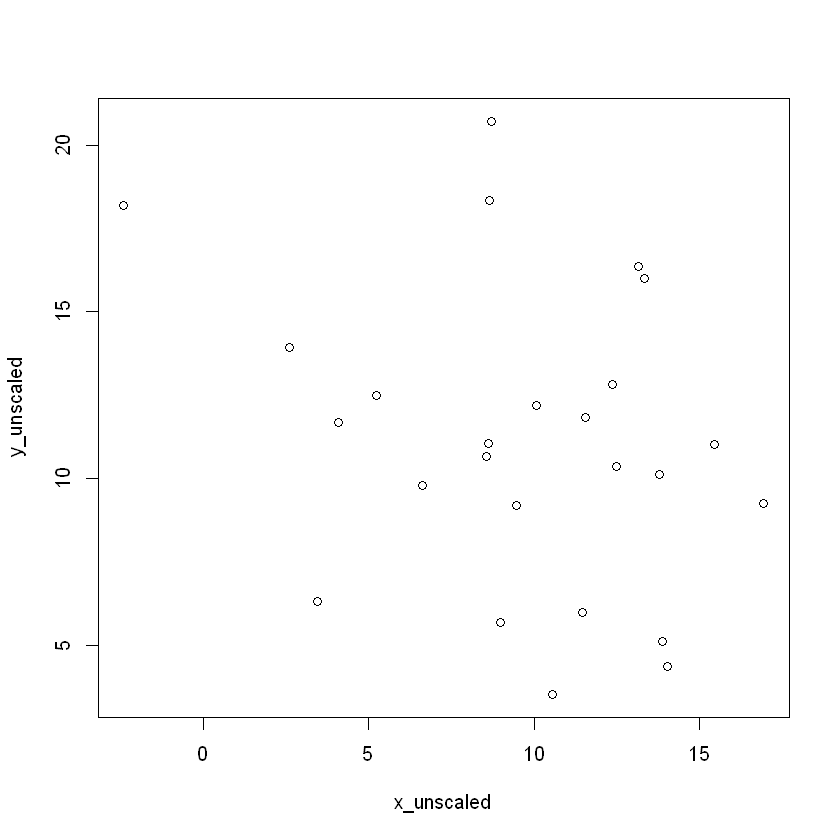

In [68]:
plot(x_unscaled, y_unscaled)

Now, let's scale it.

In [69]:
x_scaled = scale(x_unscaled)
y_scaled = scale(y_unscaled)

In [81]:
df_1 = data.frame(x = x_unscaled,y = y_unscaled, type = as.factor(rep.int(0,25)))
df_2 = data.frame(x = x_scaled,  y = y_scaled  , type = as.factor(rep.int(1,25)))
df = rbind(df_1, df_2)

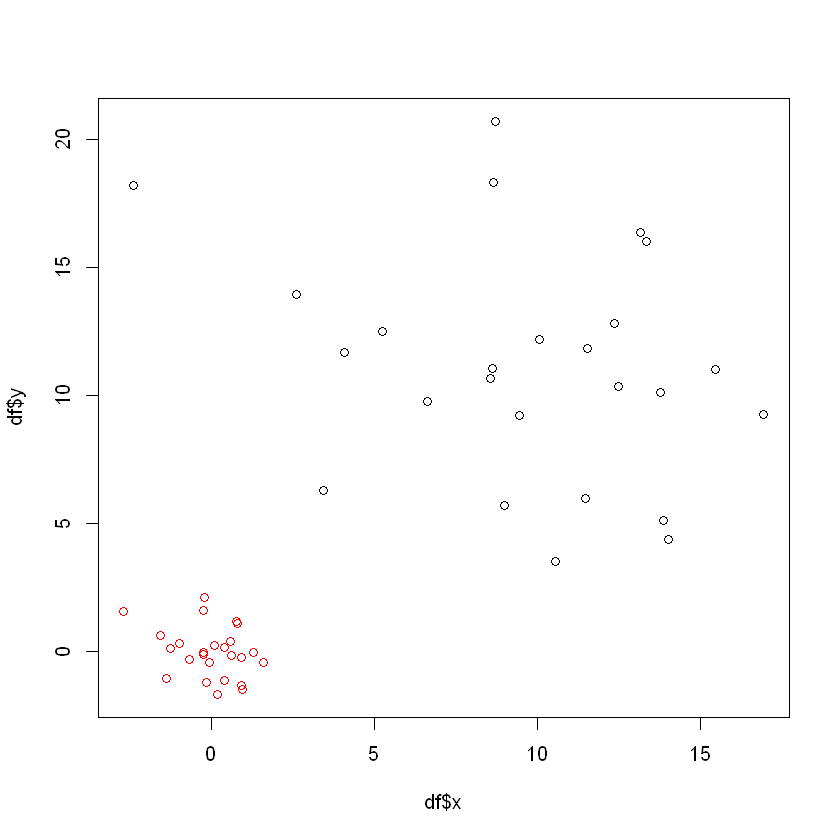

In [83]:
plot(df$x, df$y, col= df$type)

Scaled data has a mean of zero and a variance of 1.

In [88]:
round(mean(x_scaled))

[1] 0

In [89]:
round(mean(y_scaled))

[1] 0

In [91]:
sd(x_scaled)

[1] 1

In [92]:
sd(y_scaled)

[1] 1

Scaling does not typically work if data

- is Sparse
- contains outliers. 

In cases like these, we would have to use special scalers.

<hr>

#### Non-Linear Transformations

Sometimes, some of the features are not on a linear scale. One of the most frequently encountered example of this is logarithmic data. Here are some simple examples of such data.

- Alexa Page rank or Google Domain Authority 
- Income data
- Some Engineering data (for ex., hardness of material) etc

As you know by now (or are going to learn in the next sections when you learn more ML algorithms), most ML algorithms are based on finding out distance between points. Exponential data fits poorly with most ML algorithms. It is suggested that we transform exponential data using logarithmic functions. Numpy offers functions for the same. For example, look at the following data

In [103]:
x_unscaled = rnorm(n = 25, mean = 10, sd = 5)
y = rnorm(n = 25, mean = 10, sd = 5)
y_unscaled = exp(y)

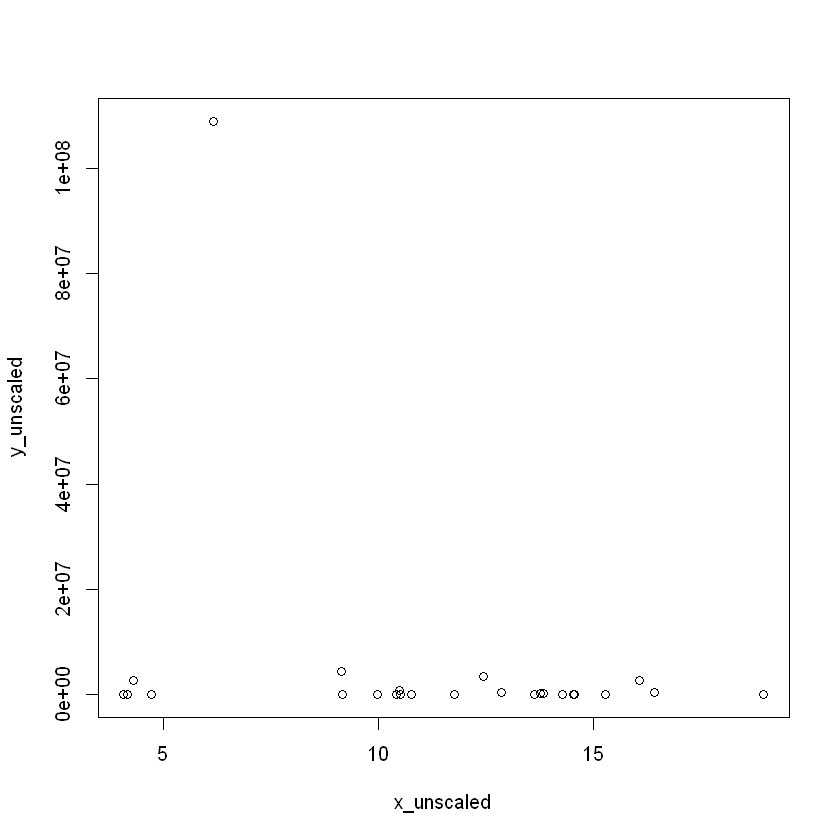

In [104]:
plot(x_unscaled, y_unscaled)

Just by looking at the data above, you will instantly realize that this data needs to be transformed. If not, the distances on the y-axis is so large (in comparision to the x-axis) that it will dominate the influence of x-axis. A simple solution in cases like this would be some kind of non-linear transformation like log.

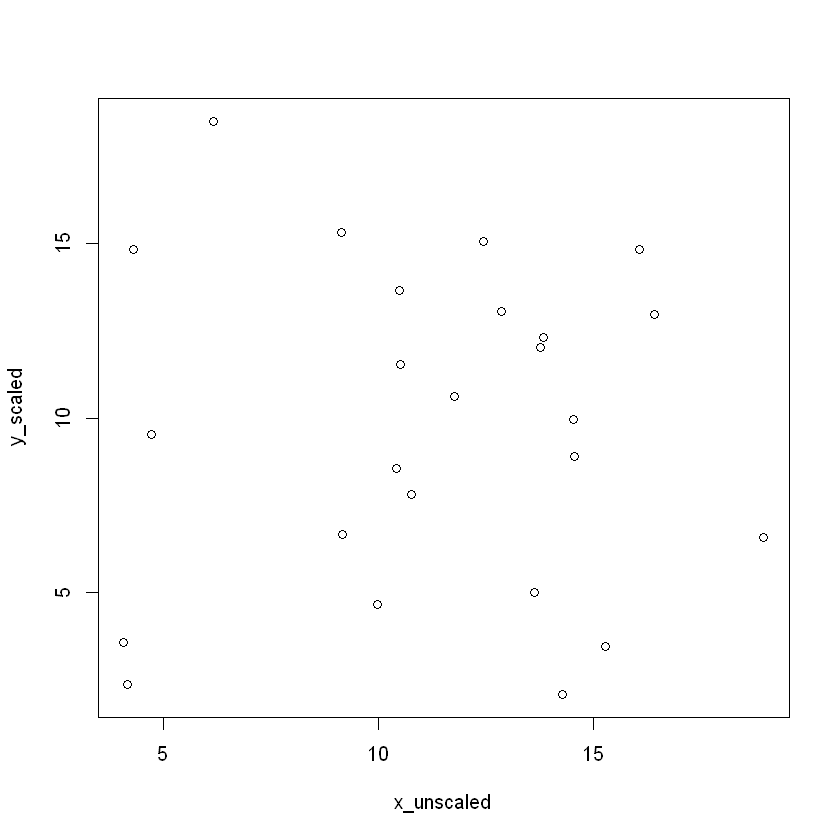

In [105]:
y_scaled = log(y_unscaled)

plot(x_unscaled,y_scaled)

This looks much more balanced, isn't it ?

There are other types of non-linear transforms like

- Quantile Transforms
- Power Transforms

that we will not be discussing in this section.

<hr>

#### Encoding Categorical Features

Categorical features are by definition non-numeric. So, they are not ideal for most Machine Learning algorithms. 

Most of the time, there are very few values to a categorical feature. for example, 

- sex
  - Male
  - Female
- Browser
  - Chrome
  - Firefox
  - Edge

There are two types of encoders sklearn provides for encoding categorical values

- Ordinal Encoder
- One-Hot Encoder

<hr>

#### Ordinal Encoder

In [108]:
user_id = c(1,2,3,4,5,6,7,8,9,10)
sex     = c("Male","Male","Female","Male","Female","Female","Male","Female","Female","Female")
browser = c("Chrome","Chrome","Chrome","Firefox","Edge","Firefox","Edge","Chrome","Firefox","Chrome")

data_dict    = data.frame(user_id , sex, browser)
head(data_dict)

,user_id,sex,browser
,<dbl>,<fct>,<fct>
1,1,Male,Chrome
2,2,Male,Chrome
3,3,Female,Chrome
4,4,Male,Firefox
5,5,Female,Edge
6,6,Female,Firefox


In [84]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder().fit(browser_data)

encoder.transform(browser_data)

array([[0., 1., 0.],
       [1., 1., 0.],
       [2., 0., 0.],
       [3., 1., 2.],
       [4., 0., 1.],
       [5., 0., 2.],
       [6., 1., 1.],
       [7., 0., 0.],
       [8., 0., 2.],
       [9., 0., 0.]])

Basically OrdinalEncoder encodes categorical data into ordinal data. All it has done in this case is to transform the data based on the following simple assignment

- Female = 0 , Male = 1
- Chrome = 0 , Edge = 1, Firefox = 2

<hr>

#### One-Hot Encoder

However, sometimes this kind of data is not suitable for some of the Machine Learning algorithms - simply because the numbers don't represent actual value. Meaning, there is no numeric meaning in the transformation for sex. 

Male = 1 does not mean, it is in anyway greater than Female = 0.

Scikit Learn provides another encoder for categorical data that can subvert this problem - One-Hot Encoder or Dummy encoder.

In [98]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder().fit(browser_data.iloc[:,1:3])

encoder.transform(browser_data.iloc[:,1:3]).toarray()

array([[0., 1., 1., 0., 0.],
       [0., 1., 1., 0., 0.],
       [1., 0., 1., 0., 0.],
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 1., 0., 0.]])

In [99]:
encoder.categories_

[array(['Female', 'Male'], dtype=object),
 array(['Chrome', 'Edge', 'Firefox'], dtype=object)]

<hr>

### Missing Values

Missing values is a huge problem in real datasets. Most of the time, this happens with datasets that is manually collected. Sometimes this is a necessary evil when merging data.

In [2]:
# Lets introduct some missing values in the iris dataset.
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()

iris_small = iris.data[0:10,:]
iris_small[iris_small[:,:]>5.2  ] = np.nan

iris_small

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [nan, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

<img src="./pics/drop-na-numpy.png"/>

In [131]:
iris_small[~np.isnan(iris_small).any(axis=1)]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

Dropping unknown values (NaN) is typically a decent strategy when dealing unknown values. However, if the data itself is biased, the algorithm's fit could also be biased. For example, imagine the person collecting the iris data could not find enough flowers of a particular species. In cases like that, missing values could be very skewed. Dropping NA's sometimes could result in data that is biased and the resulting algorithm could also be biased.

An alternative way of dealing with NA's is called **imputation**.

<hr>

#### Imputation of missing values

Here is the definition of _Impute_ according to the dictionary.

> assign (a value) to something by inference from the value of the products or processes to which it contributes.

In [5]:
iris_small

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [nan, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

<img src="./pics/simple-imputer-visual.png"/>

In [19]:
iris_without_na = iris_small[~np.isnan(iris_small).any(axis=1)]
iris_without_na

# ~np.isnan(iris_small).any(axis=1)

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [21]:
iris_without_na.mean(axis=0)

array([4.8       , 3.24444444, 1.42222222, 0.2       ])

In [6]:
import numpy as np
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(iris_small)
imputer.transform(iris_small)


iris_new = imputer.transform(iris_small)
iris_new


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [4.8, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

**mean** is just one of the strategy to fill NAs. _SimpleImputer_ supports couple more strategies that are pretty obvious to understand.

- **median**
- **most_frequent**
- **constant**

The trick to choosing the strategy is to understand the type of data we are trying to impute. Here are some scenarios that would require you to choose a specific strategy.

- **median** - Income data or other data with large variance at the very end (or even large outliers).
- **most_frequent** - This is essentially imputing with the mode of the feature. 
- **constant** - This is typically used in filling NAs of categorical variables ( say Male/Female & and another category say "Unknown" ). 

There is one more method for imputation that is supported by scikit learn - IterativeImputer. It is based on predicting the values by modeling each of the features based on the rest of the features. 

<img src="./pics/iterative-imputer.png"/>

In [3]:
iris_small_na = iris_small

iris_small_na[3,1] = np.nan
iris_small_na[7,2] = np.nan
iris_small_na[1,3] = np.nan

iris_small_na

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, nan],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, nan, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [nan, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, nan, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [4]:
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(max_iter=10, random_state=0)
imputer.fit(iris_small_na)

iris_small_no_na = imputer.transform(iris_small_na)

<pre>
> pip install --user --upgrade scikit-learn
</pre>

In [5]:
iris_small_no_na

array([[5.1       , 3.5       , 1.4       , 0.2       ],
       [4.9       , 3.        , 1.4       , 0.08307883],
       [4.7       , 3.2       , 1.3       , 0.2       ],
       [4.6       , 3.097572  , 1.5       , 0.2       ],
       [5.        , 3.6       , 1.4       , 0.2       ],
       [4.84755009, 3.9       , 1.7       , 0.4       ],
       [4.6       , 3.4       , 1.4       , 0.3       ],
       [5.        , 3.4       , 1.45167903, 0.2       ],
       [4.4       , 2.9       , 1.4       , 0.2       ],
       [4.9       , 3.1       , 1.5       , 0.1       ]])

<hr>

### Data Modeling

Modeling is the second step in the machine learning pipiline. There are many modeling algorithms and we will be studying most of them in Week 2/3/4. However, in this section, we will focus on how to validate models.

#### Model Evaluation Metrics

The actual metric used to evaluate the model varies based on the class of Machine Learning Algorithm used. 

**Classification** - _Confusion Matrix, Area Under Curve -  ROC_ <br>
**Regression**     - _R<sup>2</sup>, Root Mean Squared Error (RMSE), Mean Absolute Error (MAE)_

Here are the links to each of these topics. 

| Classification | Regression |
| --- | --- |
| <a href="https://ajaytech.co/python-regression/#r-squared---r2">R<sup>2</sup></a>, <a href="https://ajaytech.co/python-regression/#RMSE---Root-Mean-Square-error">RMSE</a>, MAE| <a href="https://ajaytech.co/python-classification/#confusion-matrix"> Confusion Matrix</a>, <a href="https://ajaytech.co/python-logistic-regression/#roc-curve"> ROC Curve</a> |

<hr>

#### Model Validation

The evaluation metrics discussed above are run on the test datasets. But that doesn't necessarily mean that the accuracy metrics apply equally well to real data or even to the dataset at hand (just based on the train/test split). We have to ensure that the model didn't just memorize the data (overfitting) or is biased (underfitting). 

In case you are wondering why we are doing this, it is because almost all the time we only work with a subset of the real dataset. How do we know that our subset is a true representation of the real data ?

This is where validation comes in - Validation ensures that we average our model's performance multiple times over different subsets of the data that we have so that we don't just rely on one test. Think of _Model Valuation_ as a **Rinse and Repeat** modeling to ensure we get a more realistic result.

> _Model Evaluation_ checks for model accuracy on a single test set. _Model Validation_ runs the model evaluation multiple times over different subsets of the data available 

There are many techniques to validate models. We will just learn about the following important ones that are widely used in the industry.

- Hold-out
- K-fold cross-validation
- Bootstrapping

<hr>

#### Hold-out

Hold-out is the simplest validation method. It is what we have used when we learnt about the basics of <a href="https://ajaytech.co/python-regression">Regression</a> and <a href="https://ajaytech.co/python-classification">Classification</a> in the previous chapters. 

It is a very simple one step process.

<img src="./pics/hold-out-method.png"/>

In [27]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

iris = datasets.load_iris()

In [33]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=100)
model = LogisticRegression(solver="lbfgs",multi_class="auto", max_iter=200 )
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
y_predict = model.predict(X_test)

In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print ( "confusion matrix = \n" , confusion_matrix(y_test, y_predict) )
print ( "accuracy score = ",accuracy_score(y_test,y_predict) )

confusion matrix = 
 [[11  0  0]
 [ 0  5  1]
 [ 0  0 13]]
accuracy score =  0.9666666666666667


<hr>

#### Cross-Validation

Think of Cross-validation as a recursive version of Hold-out method. For example, in hold-out we just hold-out a percentage of data ( say 20%), train the data on the remaining data. And finally test it on the held-out 20% of the data. 

The problem with this approachis that it could result in over-fitting. To avoid this, we use cross-validation. 

In cross-validation, we essentially do the same thing as the "hold-out" method - except that it is done in multiple iterations. The following picture shows a quick visual on how we would do this on just 10 rows of data. In this specific case, it is a 5 fold validation, because we have divided the entire dataset into 5 folds (2 rows each).

And finally, the test results over each of the iterations are averaged to provide a better estimation of the algorithm's performance. That way, we get a more realistic performing algorithm (compared to the hold-out method).

<img src="./pics/cross-validation-visual.png"/>

Scikit Learn provides readymade implementation of Cross validation. 

In [16]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

iris = datasets.load_iris()

In [39]:
k_fold = model_selection.KFold(n_splits=10, random_state=100)
model = LogisticRegression(solver="lbfgs",multi_class="auto", max_iter=200 )
scores = model_selection.cross_val_score(model, iris.data, iris.target, cv=k_fold)

In [40]:
scores

array([1.        , 1.        , 1.        , 1.        , 0.93333333,
       0.86666667, 1.        , 0.86666667, 0.86666667, 0.93333333])

In [41]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy: 0.95 (+/- 0.12)


So, the real accuracy is 95% (as opposed to 96.6% as determined by a single train/test split using the hold-out method above). In this case, the data is pretty good and there is not a lot of difference between the hold-out vs cross validation accuracy. However, in real-world datasets where the variance is large, cross-validation does make a huge difference. 

What have we achieved here ? 

- Reduced over-fitting
- Reduce model bias

k-fold cross validation is the preferred method in cross validation. There are other validation methods like

- LOOCV (Leave One Out Cross Validation)
- LPOCV (Leave P Out Cross Validation)
- Straified k-fold (A specific type of doing the folds in k-fold validation)